<h1 align="center"><u>Analysis on corona virus dataset</u></h1>

<h3>1] Description:-</h3>

This dataset contains 7k+ patient information with 15 different features.
<ul>
    <li>id: Unique id of the patient.</li>
    <li>sex: Sex/Gender of the patient.</li>
    <li>birth_year: Birth year of the patient.</li>
    <li>country: Country of the patient.</li>
    <li>region: Residential region of the patient.</li>
    <li>Disease: 0: no disease / 1: underlying disease</li>
    <li>group: The collective infection.</li>
    <li>infection_reason: How the patient got infected.</li>
    <li>infection_order: The order of infection.</li>
    <li>infected_by: The ID of the patient who infected this patient.</li>
    <li>contact_number: The number of contacts with people.</li>
    <li>confirmed_date: The date of confirmation that people is infected.</li>
    <li>released_date: The date of discharge.</li>
    <li>deceased_date: The date of decease.</li>
    <li>state: The current state of the patient.</li>
</ul>
Here, state is a class feature which states the current state of patient which can be either isolated, released and deceased.

<b>Note: </b>
Dataset structure, graph and observation may vary somewhere because this dataset is keeps on updating. So, static textual observation may be little different from graphical representation. 

<h3>2] Importing the required packages and csv file:-</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

 
patient = pd.read_csv(r"C:\Users\user\Desktop\portfolio -E\Corona Virus Dataset Exploratory Data Analysis\patient.csv")
patient.head(5)

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [2]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 15 columns):
patient_id          7869 non-null int64
sex                 679 non-null object
birth_year          666 non-null float64
country             7869 non-null object
region              437 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7869 non-null object
released_date       56 non-null object
deceased_date       36 non-null object
state               7869 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 922.2+ KB


In [3]:
patient['state'].value_counts()

isolated    7777
released      56
deceased      36
Name: state, dtype: int64

Out of 7k+ patients, there are 50+ patients who got discharge and 30+ patients couldn't survive from this disease whereas remaining patients are still under isolation.

<h3>3] Data pre-processing:-</h3>

Adding new feature age by subtracting current year with birth year feature.

In [5]:
patient['age'] = 2020 - patient['birth_year']

Now, lets create new dataframes for each state i.e. isolated,released and deceased.

In [6]:
deceased = patient.loc[patient['state'] == 'deceased']
released = patient.loc[patient['state'] == 'released']
isolated = patient.loc[patient['state'] == 'isolated']

In [7]:
#Adding one more feature to deceased dataset which will contain the number of days patient survived.
date_column = ["confirmed_date","deceased_date"]
for i in date_column:
    deceased[i] = pd.to_datetime(deceased[i])
deceased["no_of_days_survived"] = deceased["deceased_date"] - deceased["confirmed_date"]
deceased.head(5)

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,no_of_days_survived
37,38,female,1963.0,Korea,Daegu,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased,57.0,5 days
53,54,male,1963.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,57.0,4 days
54,55,male,1961.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-19,NaN,2020-02-23,deceased,59.0,4 days
103,104,male,1957.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-20,NaN,2020-02-19,deceased,63.0,-1 days
106,107,male,1953.0,Korea,Gyeongsangbuk-do,1.0,Cheongdo Daenam Hospital,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-24,deceased,67.0,3 days


In [8]:
#Adding one more feature to deceased dataset which will contain the number of days patient was admitted before discharged.
date_column = ["confirmed_date","released_date"]
for i in date_column:
    released[i] = pd.to_datetime(released[i])
released["no_of_days_treated"] = released["released_date"] - released["confirmed_date"]
released.head(5)

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,no_of_days_treated
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0,17 days
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0,12 days
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0,17 days
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0,13 days
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,33.0,32 days


In [9]:
print('The percentage of released patient is: ',(len(released) * 100) / len(patient))
print('The percentage of deceased patient is: ',(len(deceased) * 100) / len(patient))
print('The percentage of isolated patient is: ',(len(isolated) * 100) / len(patient))

The percentage of released patient is:  0.7116533231668573
The percentage of deceased patient is:  0.4574914220358368
The percentage of isolated patient is:  98.8308552547973


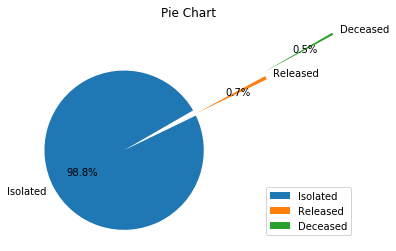

In [10]:
state = 'Isolated', 'Released', 'Deceased'
sizes = [(len(isolated) * 100) / len(patient),(len(released) * 100) / len(patient),(len(deceased) * 100) / len(patient)]
explode = (0,1,2)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=state, autopct='%.1f%%',
        shadow=False, startangle=30)
ax.axis('equal')
plt.legend()
plt.title('Pie Chart')
plt.show()

The above pie chart shows that around 98.9% of total patient is under isolation whereas around 0.7% patient got discharged and unfortunately 0.4% patient couldn't survived.

<b>Note: </b> Observation percentage may vary from pie chart as dataset keeps on updating. 

<h3>4] Probability distribution function:-</h3>

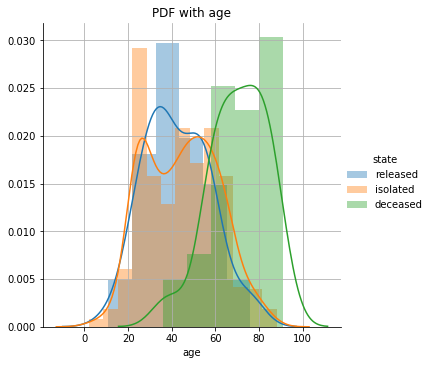

In [11]:
sns.FacetGrid(patient, hue="state", size=5) \
 .map(sns.distplot, "age") \
 .add_legend()
plt.title('PDF with age')
plt.grid()
plt.show()

<h4>Observation:-</h4>
* Most of the patient who didn't survived has age between 60 and 80.<br>
* Most of the patient who got discharged has age between 45 and 55.

<h3>5] Cumulative density function:-</h3>

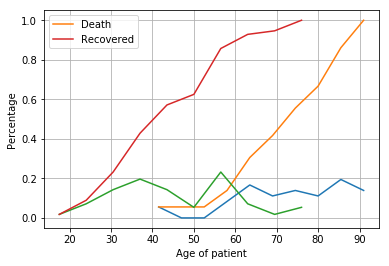

In [12]:
counts, bin_edges = np.histogram(deceased['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Death')

counts, bin_edges = np.histogram(released['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf, label = 'Recovered')

plt.xlabel('Age of patient')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.show()

The above graph shows the PDF and CDF for deceased and released patient with age in X-axis.<br><br>
<h4>Observation:-</h4>
* We can observer that almost 62% of the patient who recovered has age less than 50 years.
<br>
* All the patient who didn't survive has age greater than 40 and almost 80% of deceased patient has age greater than 55.

<h3>6] Count Plot:-</h3>

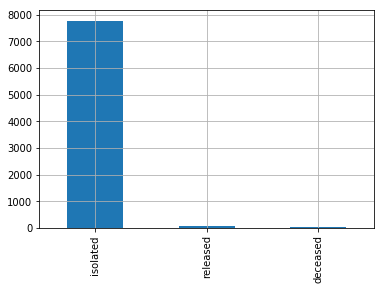

In [13]:
#Countplot the ith state feature.
patient.state.value_counts().plot.bar().grid()

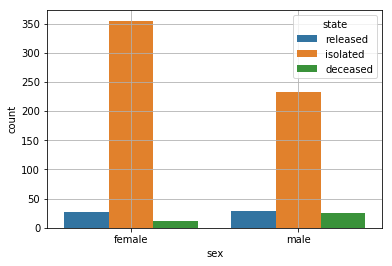

In [14]:
sns.countplot(x="sex", hue="state", data=patient).grid()

The above countplot shows the state of the patient of male and female.<br><br>
<h4>Observation:-</h4>
* Most of the patient who didn't survive is male patient.

<h3>7] Box Plot:-</h3>

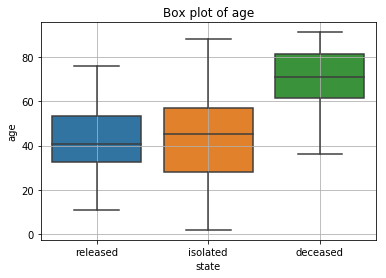

In [15]:
sns.boxplot(x = 'state',y = 'age', data = patient)
plt.title('Box plot of age')
plt.grid()
plt.show()

<h4>Observation:-</h4>
* Almost 50% of patient who got discharge has age less than 42.<br>
* More than 75% of patient who didn't survived has age greater than 60.

<h3>8] Violin Plot:-</h3>

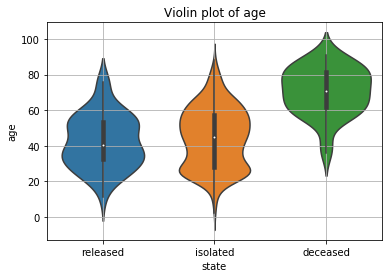

In [16]:
sns.violinplot(x = 'state', y= 'age', data = patient, size = 4)
plt.title('Violin plot of age')
plt.grid()
plt.show()

<h4>Observation:-</h4>
* Most of the patient who didn't survive has age of 60.<br>
* Most of the patient who got discharge has age of 40.

<h3>9] Bar Plot:-</h3>

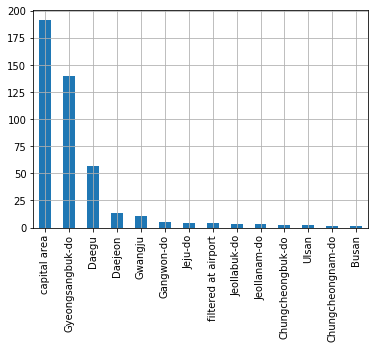

In [17]:
patient.region.value_counts().plot.bar().grid()

<h4>Observation:-</h4>
* Most of the people who was infected by corona virus belongs to capital area region.

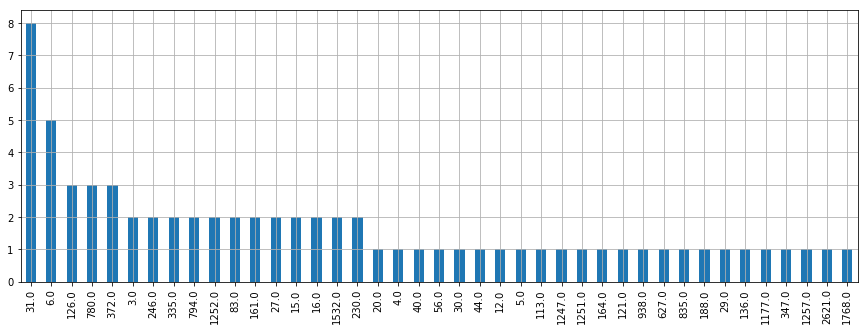

In [18]:
plt.figure(figsize=(15,5))
patient.infected_by.value_counts().plot.bar().grid()

<h4>Observation:-</h4>
* Most of the patient got infected by the patient with ID 31.

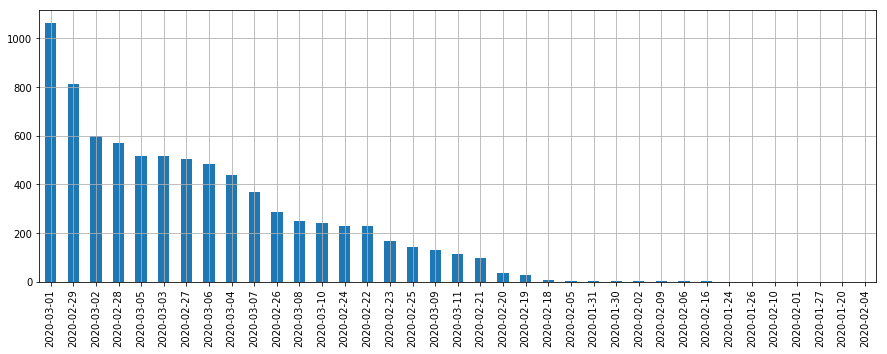

In [19]:
plt.figure(figsize=(15,5))
patient.confirmed_date.value_counts().plot.bar().grid()

<h4>Observation:-</h4>
* On 1st March, most of the patient got confirmation that they are corona +ve.

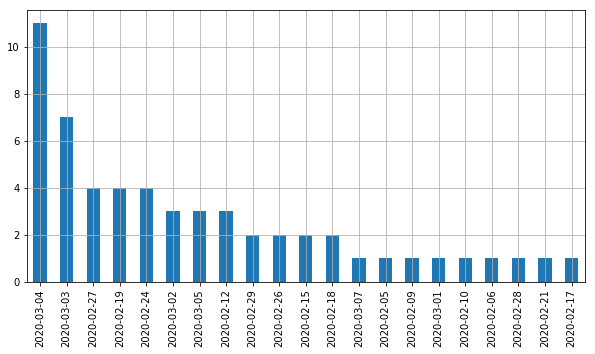

In [20]:
plt.figure(figsize=(10,5))
patient.released_date.value_counts().plot.bar().grid()

<h4>Observation:-</h4>
* On 4th March, most of the patient has been discharged.

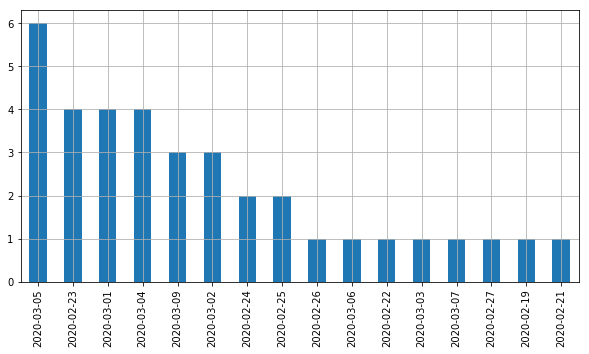

In [21]:
plt.figure(figsize=(10,5))
patient.deceased_date.value_counts().plot.bar().grid()

<h4>Observation:-</h4>
* On 5th March, unfortunately most of the patient died.

<h3>10] 2D-scatter Plot:-</h3>

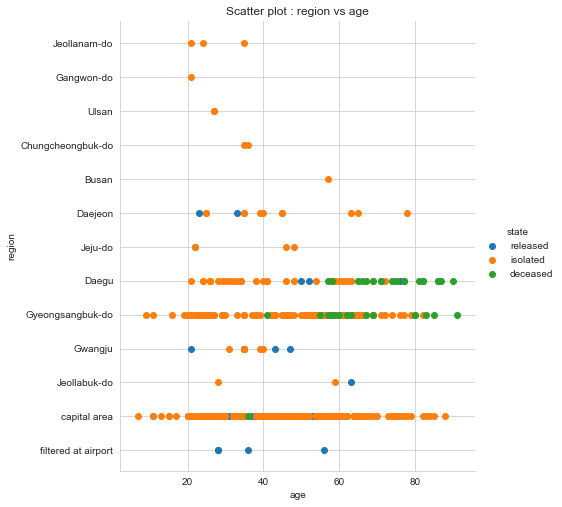

In [22]:
sns.set_style("whitegrid")
sns.FacetGrid(patient, hue = 'state', size = 7)\
.map(plt.scatter, 'age', 'region')\
.add_legend()
plt.title('Scatter plot : region vs age')
plt.show()

<h4>Observation:-</h4>
* Most of the patient belongs to capital area region.<br>
* From Daegu and Gyeongsangbuk-do region most of the patient died.

<h3>11] 3D-scatter Plot:-</h3>

In [23]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()
trace = go.Scatter3d(
    x= patient['age'],
    y=patient['country'],
    z=patient['infection_reason'],
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 8}
)
data = [trace]
plot_figure = go.Figure(data=data, layout=layout)
plotly.offline.iplot(plot_figure)

ModuleNotFoundError: No module named 'plotly'

<h4>Observation:-</h4>
* In Korea country, most of the people got infected by corona virus due to two resons(i.e. contact with patient and visit to Daegu) irrespective of their ages.<br>
* So we can conclude that contact with infected patient is the main reason for corona spread.

<h3>12] Linear Regression:-</h3>

<h4>Explanation & problem statement:</h4>
* The number of cases from one day to next day are completely random as the number of cases increases day by day are independent of each other.
* As of now let's assume number of new cases each day is proportional to the number of existing cases, it means each day it's get multiplied by a constant.
* Intuitively it means as the date changes, the number of confirmed cases also increases as they both are directly proportional to each other.
* So, if we compare total cases from one day to next day, then tracking the changes between number of cases is nothing but the growth factor.
* Simply growth factor is the ratio between two successive changes and that resultant ratio is the constant that get multiplied each day.
* So, with existing accumulated data(number of cases each day), we'll predict the expected number of cases for future dates by using Linear Regresion which is one of the simplest but powerful concept of machine learning.


<h4>Input and Output:</h4>
* In this model, we'll take all unique confirmed date and total number of cases for that date as an input.
* So, I'll use only confirmed_date and patient_id feature in my linear regression model.
* For all confirmed date, we'll compute total count of case for that date using patient_id feature as patient id is unique for every patient.
* For every confirmed date, it's count value will be sum of total case for that day plus sum of total case for all preceding date(i.e. accumulated count).
* And the output that we'll compute is the prediction of total number of case for future dates.

<h4>Step 1:</h4>
Computing total number of cases for each confirmed date.

In [24]:
#Calculating total number of confirmed cases for each day
case_count_per_day = patient.groupby('confirmed_date').patient_id.count()
case_count_per_day = pd.DataFrame(case_count_per_day)

<h4>Step 2:</h4>
Computing the cumulative sum of case for each date.

In [25]:
#Calculating cumulative sum of confirmed cases as date increased(total number of cases increases as date changes)
data = case_count_per_day.cumsum()
#Picking up the continuous data w.r.t. dates
dataset = data.iloc[16:]

<h4>Step 3:</h4>
Selecting the range of dates and total number of future date that want to be predicted.

In [26]:
# This var will be used to predict the cases till next 7 days
days_in_future = 7
dates = pd.date_range('2020-2-20','2020-3-11')

#This is to predict the cases for future dates
future_y_pred = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

#This var will be used to compute the R^2
y_pred = np.array([i for i in range(len(dates))]).reshape(-1, 1)

<h4>Step 4:</h4>
Re-shaping the data to fit it in our model.

In [27]:
#Re-shaping the data
x = np.array([i for i in range(len(dates))]).reshape(-1, 1) # index -> ndarray
y = np.array(dataset).reshape(-1, 1) # count->ndarray

<h4>Step 5:</h4>
Fitting the model and predicting the output.

In [28]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x, y)
linear_pred = linear_model.predict(future_y_pred)

<h4>Step 6:</h4>
Calculating coefficient of determination(R^2).

In [29]:
y_pred = linear_model.predict(y_pred)
r_sq = linear_model.score(x,y)
print("The coefficient of determination(R^2) for this model is: "+"{:.2f}".format(r_sq*100),'%\n')

The coefficient of determination(R^2) for this model is: 96.91 %



* Coefficient of determination of 96.91% shows that more than 96% of the data fit our linear regression model.
* Generally, a higher coefficient indicates a better fit for the model.

<h4>Step 7:</h4>

Plotting the graph with confirmed date in X-axes and linear model predicted and actual number of case in Y-axes.

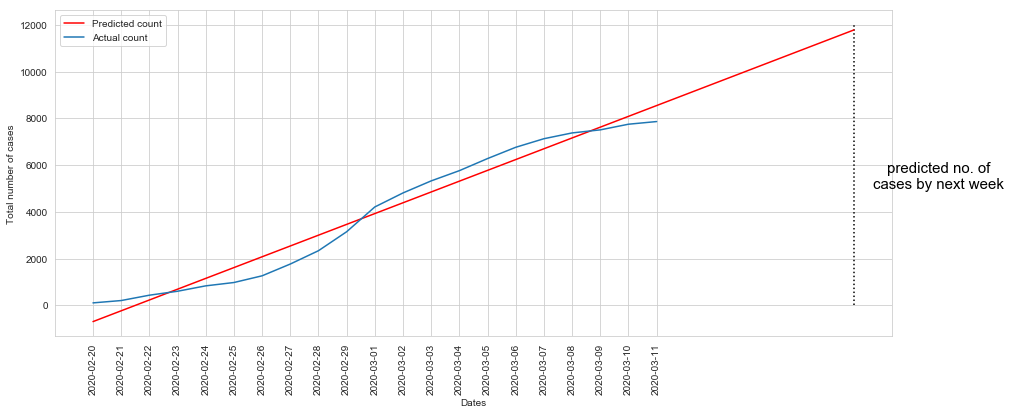

In [30]:
#Size of graph
plt.figure(figsize=(15,6))

#Plotting linear model predicted number case for each date(curent + future dates)
plt.plot(linear_pred, color='red', label='Predicted count')

#Plotting actual number of cases for each date
plt.plot(dataset, label='Actual count')

#Labeling X and Y axes.
plt.xlabel('Dates')
plt.ylabel('Total number of cases')

#Drawing a vertical line which touches linear model predicted last value
plt.vlines(x=len(linear_pred)-1, ymin=0, ymax=12000, linestyles='dotted')
plt.text(x=len(linear_pred)+2, y=5000, s='predicted no. of\ncases by next week',color='black',\
         fontsize =15,horizontalalignment='center') 
plt.xticks(rotation=90)

plt.legend()
plt.show()

<h4>Observation:-</h4>
* By observing the rate of change of total number of cases as date changes, we've predicted the expected total number of cases for next week(i.e. 7th day).
* The predicted total number of cases for next week(i.e. on 18th March) is approximately 11900.
<br><br>
<b>Note: </b>
As this dataset get keeps on updating, the static textual observation and graphical representation may vary. So the graphical representation will always show the updated dynamic result(i.e. predicted number of cases).

<h3>13] Conclusion:-</h3>

<ul>
    <li>The given dataset is collected by KCDC for Korea, China and Mongolia country.</li>
    <li>Only 0.4% of patient died but also only 0.7% of patient recovered and still around 98.9% of patient are under isolation.</li>
    <li>So, the death probability is low but also recovering from this virus is difficult.</li>
    <li>The most of the patient died within a 5 days after confirmation. So, the treatment of corona virus has to be started immediately after confirmation as it's impact is really hazardous.</li>
    <li>The patient with age between 35 and 45 years is more likely to get released but this is not true in all cases.</li>
    <li>Most of the patient with age greater than 55 couldn't survived from this virus.</li>
    <li>In Daegu and Gyeongsangbuk-do region, most of the patient died.</li>
    <li>The one of the main reason for corona virus spread is due to contact with infected patient.</li>
    <li>As this dataset is imbalanced, so predicting the survival chances is difficult. But we can observer the most likey reason for virus spread, maximum number of infected patient in particular region.</li>
    <li>So, even though death percentage is low but recovering from this virus is difficult.</li>
</ul>